# Creating Static Maps API from Scratch
## Victor Gau
## 2015/11/02

In [1]:
# 會使用到兩個套件
# PIL 用來處理影像
# Requests 用來抓取網路資料

from PIL import Image
import requests
from StringIO import StringIO

## 介紹一下 PIL 的使用

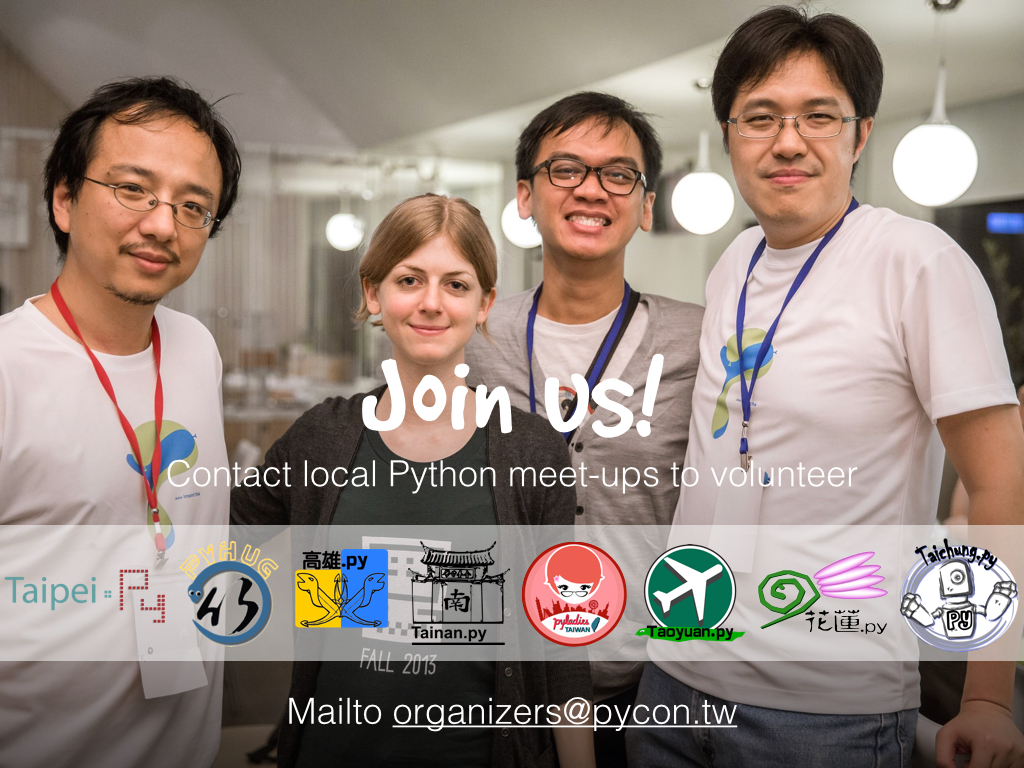

In [2]:
# 讀出第一章圖
im1 = Image.open("Promotion_General.001.jpg")
im1
# To rotate:
# im1.rotate(45)

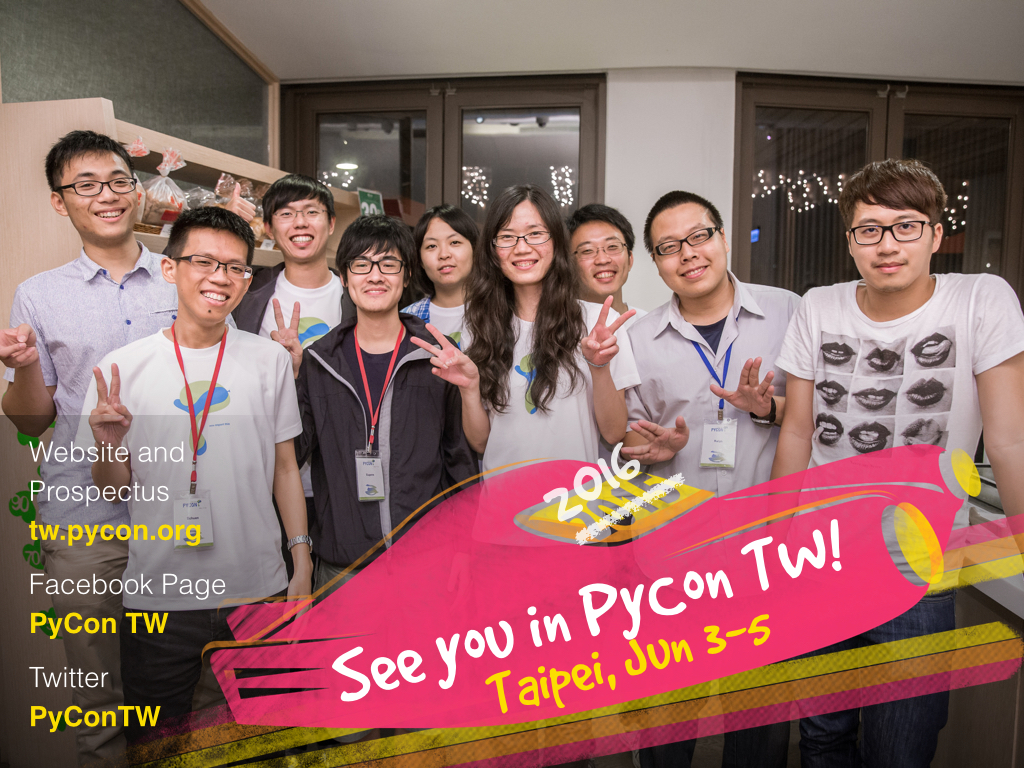

In [3]:
# 讀出第二張圖
im2 = Image.open("Promotion_General.002.jpg")
im2

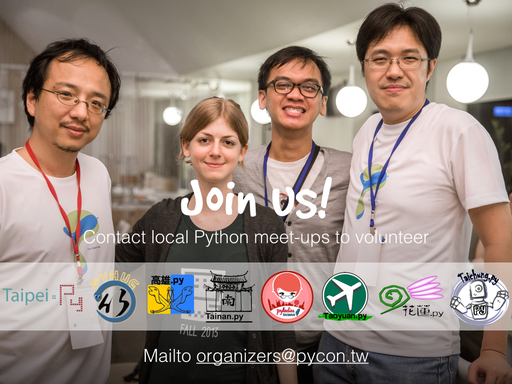

In [4]:
size = 512, 512
im1.thumbnail(size, Image.ANTIALIAS)
im1

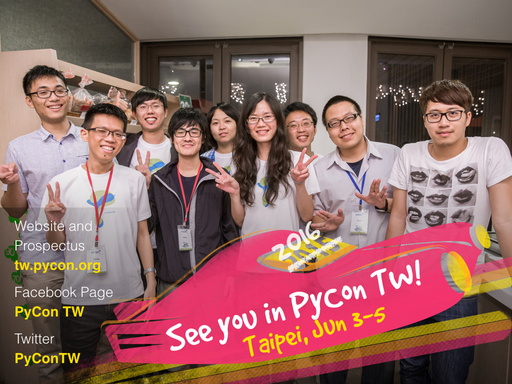

In [5]:
im2.thumbnail(size, Image.ANTIALIAS)
im2

(512, 384)
(512, 384)
(1024, 384)


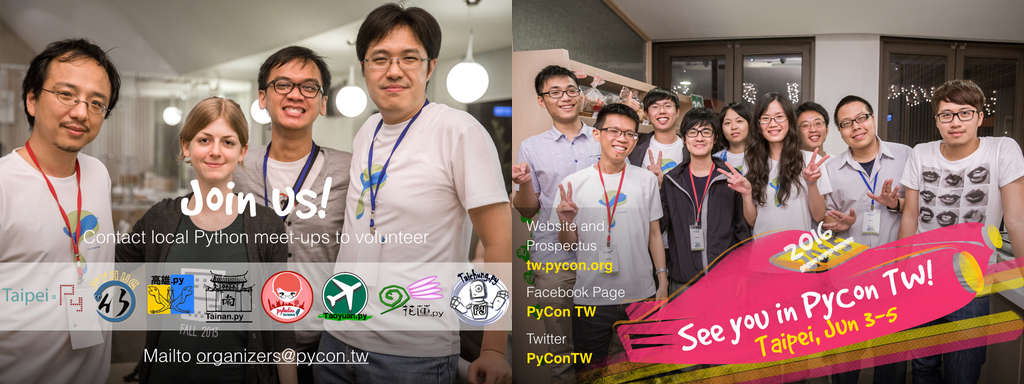

In [6]:
im3 = Image.new("RGB",(im1.size[0]+im2.size[0], im1.size[1]),"black")
print im1.size
print im2.size
print im3.size
im3.paste(im1,(0,0,im1.size[0],im1.size[1]))
im3.paste(im2,(im1.size[0], 0, im1.size[0]+im2.size[0], im2.size[1]))
im3
# To save:
# im3.save(filename,"JPEG")

## 介紹一下 Requests 的使用

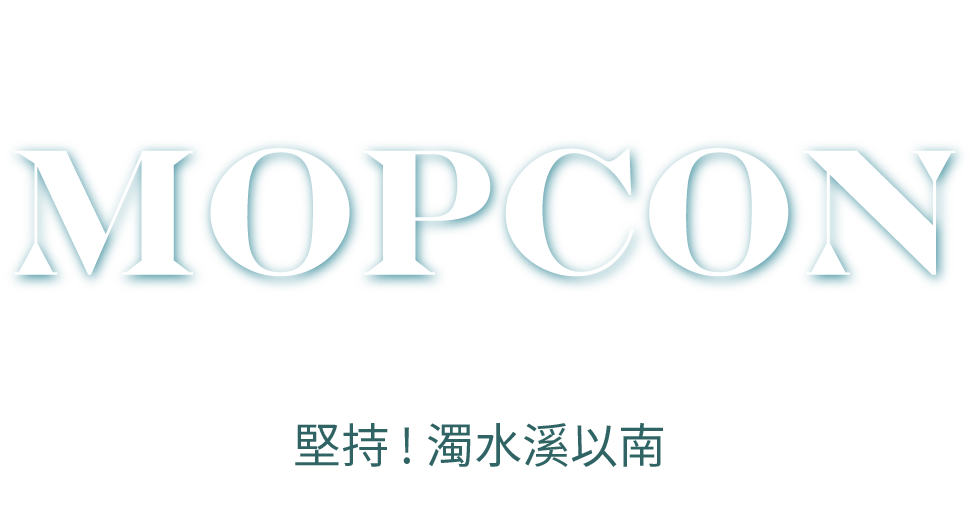

In [7]:
# 抓取 mopcon 首頁的圖
r = requests.get('http://mopcon.org/2015/images/logo_header@2x.png')
i = Image.open(StringIO(r.content))
i
# To save, use i.save()

## 進行座標轉換

In [8]:
import math

In [9]:
def deg2xy(deg, zoom, isTile=True):
    """deg=(lat,lon)"""
    lat_rad = math.radians(deg[0])
    n = 2.0 ** zoom if isTile else 2.0 ** zoom * 256.0
    x = int((deg[1] + 180.0) / 360.0 * n)
    y = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (x, y)

In [10]:
def xy2deg(xy, zoom, isTile=True):
    """xy=(x,y)"""
    n = 2.0 ** zoom if isTile else 2.0 ** zoom * 256.0
    lon_deg = xy[0] / n * 360.0 - 180.0
    lat_rad = math.atan(math.sinh(math.pi * (1 - 2 * xy[1] / n)))
    lat_deg = math.degrees(lat_rad)
    return (lat_deg, lon_deg)

## 取得圖磚

In [11]:
import geocoder

In [12]:
center=geocoder.osm(u"高雄國際會議中心").latlng

In [13]:
center

[22.6267448, 120.285980515216]

In [14]:
zoom = 16
x, y = deg2xy(center, zoom=zoom)

In [15]:
r = requests.get('http://a.tile.openstreetmap.org/{zoom}/{x}/{y}.png'.format(zoom=zoom, x=x, y=y))
maptile = Image.open(StringIO(r.content))

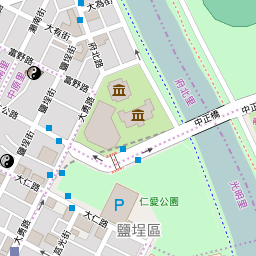

In [16]:
maptile